In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import chirp, sweep_poly
from librosa import cqt,stft
from librosa.feature import melspectrogram

import Spectrogram
import torch
import torch.nn as nn

In [2]:
cmap = 'jet'
fmin = 55 # for CQT use

fs = 44100
t = 1
f0 = 55
f1 = 22050

# Creating sin sweep

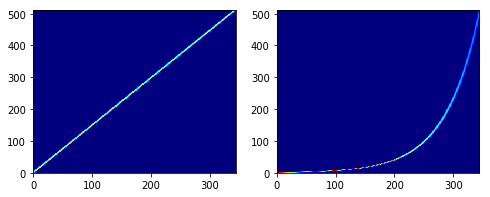

In [3]:
s = np.linspace(0,t, fs*t)
x_linear = chirp(s, f0, 1, f1, method='linear')
x_linear = x_linear.astype(dtype=np.float32)

x_exp = chirp(s, f0, 1, f1, method='logarithmic')
x_exp = x_exp.astype(dtype=np.float32)

fig, ax = plt.subplots(1,2, figsize=(8,3))
ax[0].imshow(abs(stft(x_linear, n_fft=1024, hop_length=128)), origin='lower', aspect='auto', cmap=cmap)
ax[1].imshow(abs(stft(x_exp, n_fft=1024, hop_length=128)), origin='lower', aspect='auto', cmap=cmap)

# Comparing CQT results

## nnAudio

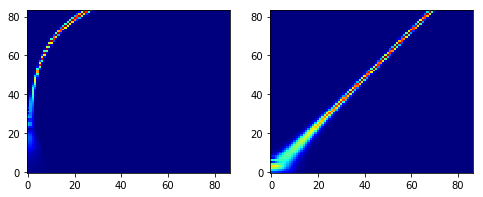

In [4]:
CQT2010_layer = Spectrogram.CQT2010(fs, fmin=fmin)
fig , ax = plt.subplots(1,2, figsize=(8,3))
cqt_x_linear = CQT2010_layer(torch.tensor(x_linear[None, None, :]))
cqt_x_exp = CQT2010_layer(torch.tensor(x_exp[None, None, :]))
ax[0].imshow(cqt_x_linear[0], aspect='auto', origin='lower', cmap=cmap)
ax[1].imshow(cqt_x_exp[0], aspect='auto', origin='lower', cmap=cmap)

## Librosa

In [5]:
output_lib1 = cqt(x_linear, sr=fs, fmin=fmin)
output_lib2 = cqt(x_exp, sr=fs, fmin=fmin)

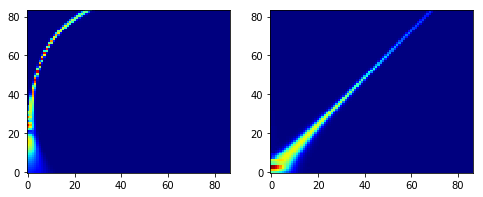

In [6]:
fig , ax = plt.subplots(1,2, figsize=(8,3))
ax[0].imshow(abs(output_lib1), aspect='auto', origin='lower', cmap=cmap)
ax[1].imshow(abs(output_lib2), aspect='auto', origin='lower', cmap=cmap)

# Melspectrogram

## nnAudio

In [7]:
torch.tensor(x_linear[None, None, :]).shape

torch.Size([1, 1, 44100])

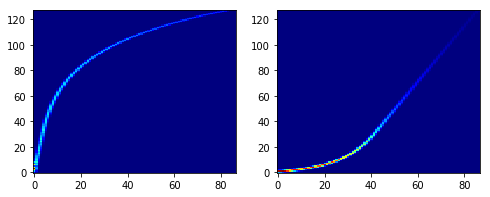

In [8]:
mel_layer = Spectrogram.MelSpectrogram(fs)
fig , ax = plt.subplots(1,2, figsize=(8,3))
cqt_x_linear = mel_layer(torch.tensor(x_linear[None, None, :]))
cqt_x_exp = mel_layer(torch.tensor(x_exp[None, None, :]))
ax[0].imshow(cqt_x_linear[0], aspect='auto', origin='lower', cmap=cmap)
ax[1].imshow(cqt_x_exp[0], aspect='auto', origin='lower', cmap=cmap)

## Librosa

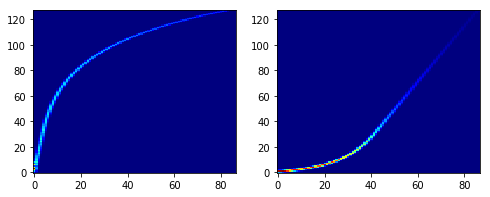

In [9]:
output_lib1 = melspectrogram(x_linear, fs)
output_lib2 = melspectrogram(x_exp, fs)
fig , ax = plt.subplots(1,2, figsize=(8,3))
ax[0].imshow(output_lib1, aspect='auto', origin='lower', cmap=cmap)
ax[1].imshow(output_lib2, aspect='auto', origin='lower', cmap=cmap)

In [10]:
print("Linear sweep all close ", np.allclose(cqt_x_linear[0].numpy(), output_lib1, 1e-3))
print("Exp sweep all closs ", np.allclose(cqt_x_exp[0].numpy(), output_lib2, 1e-3))

Linear sweep all close  True
Exp sweep all closs  True


# STFT linear freq

## nnAudio

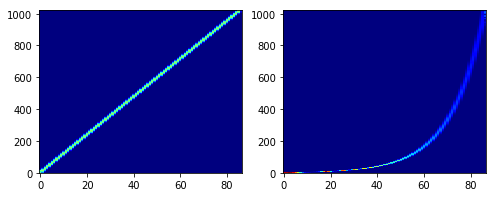

In [11]:
stft_layer_no = Spectrogram.STFT()
cqt_x_linear = stft_layer_no(torch.tensor(x_linear[None, None, :]))
cqt_x_exp = stft_layer_no(torch.tensor(x_exp[None, None, :]))

fig , ax = plt.subplots(1,2, figsize=(8,3))
ax[0].imshow(cqt_x_linear[0], aspect='auto', origin='lower', cmap=cmap)
ax[1].imshow(cqt_x_exp[0], aspect='auto', origin='lower', cmap=cmap)

## Librosa

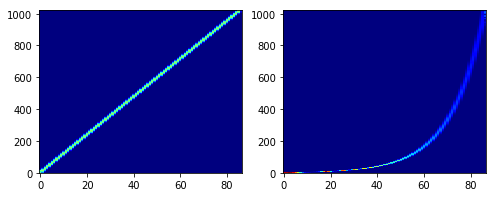

In [12]:
output_lib1 = abs(stft(x_linear))
output_lib2 = abs(stft(x_exp))

fig , ax = plt.subplots(1,2, figsize=(8,3))
ax[0].imshow(output_lib1, aspect='auto', origin='lower', cmap=cmap)
ax[1].imshow(output_lib2, aspect='auto', origin='lower', cmap=cmap)

# STFT log-freq

## nnAudio

sampling rate = 44100. Please make sure the sampling rate is correct in order to get a valid freq range


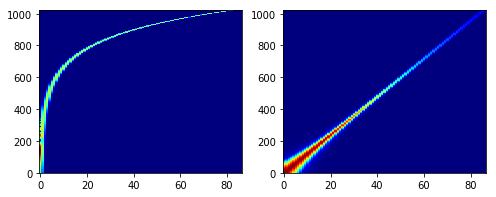

In [13]:
stft_layer = Spectrogram.STFT(freq_scale='log', low=55, high=22050, sr=44100)
cqt_x_linear = stft_layer(torch.tensor(x_linear[None, None, :]))
cqt_x_exp = stft_layer(torch.tensor(x_exp[None, None, :]))

fig , ax = plt.subplots(1,2, figsize=(8,3))
ax[0].imshow(cqt_x_linear[0], aspect='auto', origin='lower', cmap=cmap)
ax[1].imshow(cqt_x_exp[0], aspect='auto', origin='lower', cmap=cmap)